## 29 - Basic Radar Plotting Part 1

Watch video: [YouTube](https://www.youtube.com/watch?v=73fhfV2zOt8)

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from siphon.catalog import TDSCatalog
from siphon.radarserver import RadarServer
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
cat = TDSCatalog('https://thredds.ucar.edu/thredds/radarServer/catalog.xml')
url = cat.catalog_refs['NEXRAD Level III Radar from IDD'].href
rs = RadarServer(url)

In [3]:
start = datetime.datetime.utcnow() - datetime.timedelta(hours=1)
end = datetime.datetime.utcnow()
query = rs.query()
query.stations('FTG')
query.time_range(start, end)
query.variables('N0C')
query

var=N0C&time_start=2024-03-25T02%3A08%3A08.777194&time_end=2024-03-25T03%3A08%3A08.777194&stn=FTG

In [4]:
query_cat = rs.get_catalog(query)
list(query_cat.datasets)

['Level3_FTG_N0C_20240325_0303.nids',
 'Level3_FTG_N0C_20240325_0215.nids',
 'Level3_FTG_N0C_20240325_0221.nids',
 'Level3_FTG_N0C_20240325_0210.nids',
 'Level3_FTG_N0C_20240325_0239.nids',
 'Level3_FTG_N0C_20240325_0257.nids',
 'Level3_FTG_N0C_20240325_0227.nids',
 'Level3_FTG_N0C_20240325_0245.nids',
 'Level3_FTG_N0C_20240325_0233.nids',
 'Level3_FTG_N0C_20240325_0251.nids']

In [5]:
data = query_cat.datasets[0].remote_access()
list(data.variables)

['elevation',
 'azimuth',
 'gate',
 'latitude',
 'longitude',
 'altitude',
 'rays_time',
 'CorrelationCoefficient_RAW',
 'CorrelationCoefficient']

In [6]:
field_name = 'CorrelationCoefficient'
range_data = data.variables['gate'][:]
azimuth_data = data.variables['azimuth'][:]
radar_data = data.variables[field_name][:]

In [7]:
x = range_data * np.sin(np.deg2rad(azimuth_data))[:, np.newaxis]
y = range_data * np.cos(np.deg2rad(azimuth_data))[:, np.newaxis]
radar_data = np.ma.array(radar_data, mask=np.isnan(radar_data))

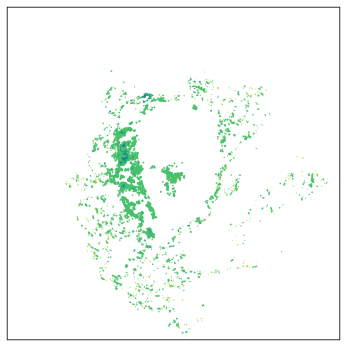

In [8]:
proj = ccrs.LambertConformal(central_longitude=data.RadarLongitude, central_latitude=data.RadarLatitude)
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(projection=proj)
ax.contour(x, y, radar_data, zorder=0)
plt.show()